In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./income_cleaned.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


In [2]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
fiftyplus         0
dtype: int64

In [3]:
print(df.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
fiftyplus             2
dtype: int64


In [4]:
df.loc[0]

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital-gain               2174
capital-loss                  0
hours-per-week               40
native-country    United-States
fiftyplus                 False
Name: 0, dtype: object

In [5]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Jobless', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [6]:
workclass_map={"State-gov":1,"Self-emp-not-inc":2,"Private":3,"Federal-gov":4,"Local-gov":5,"Jobless":6,"Self-emp-inc":7,"Without-pay":8,"Never-worked":9}

In [7]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [8]:
marital_map={"Never-married":1,"Married-civ-spouse":2,"Divorced":3,"Married-spouse-absent":4,"Separated":5,"Married-AF-spouse":6,"Widowed":7}

In [9]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'NotAppl', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [10]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [11]:
relationship_map={"Not-in-family":1,"Husband":2,"Wife":3,"Own-child":4,"Unmarried":5,"Other-relative":6}

In [12]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [13]:
race_map={"White":1,"Black":2,"Asian-Pac-Islander":3,"Amer-Indian-Eskimo":4,"Other":5}

In [14]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [15]:
# label encoding...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['native-country'] = le.fit_transform(df['native-country'])
df['occupation'] = le.fit_transform(df['occupation'])


In [16]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,38,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,38,False
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,38,False
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,38,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,4,False


In [17]:
#mannual label encoding..
df['workclass']=df['workclass'].map(workclass_map)
df['marital-status'] = df['marital-status'].map(marital_map)
df['relationship'] = df['relationship'].map(relationship_map)
df['race'] = df['race'].map(race_map)


In [18]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,1,77516,Bachelors,13,1,0,1,1,Male,2174,0,40,38,False
1,50,2,83311,Bachelors,13,2,3,2,1,Male,0,0,13,38,False
2,38,3,215646,HS-grad,9,3,5,1,1,Male,0,0,40,38,False
3,53,3,234721,11th,7,2,5,2,2,Male,0,0,40,38,False
4,28,3,338409,Bachelors,13,2,10,3,2,Female,0,0,40,4,False


In [19]:
# i need to drop education as represent by education-num also..

df['sex_bin'] = df['sex'].apply(
    lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))

# df['fiftyplus'] = df['fiftyplus'].map({'<=50K': False, '>50K': True}) 
# 

# import matplotlib.pyplot as plt
# import seaborn as sns

# # fig, ax = plt.subplots(figsize=(8, 8))

# correlation_= df.corr()

# axis_corr = sns.heatmap(
# correlation_, 
# vmin=-1, vmax=1, center=0,
# cmap=sns.diverging_palette(180, 2000, n=500),
# square=True, annot=True
# )

# plt.show()

In [20]:
df.drop(columns=['education','sex'], inplace=True)

In [21]:
df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus,sex_bin
0,39,1,77516,13,1,0,1,1,2174,0,40,38,False,1
1,50,2,83311,13,2,3,2,1,0,0,13,38,False,1
2,38,3,215646,9,3,5,1,1,0,0,40,38,False,1
3,53,3,234721,7,2,5,2,2,0,0,40,38,False,1
4,28,3,338409,13,2,10,3,2,0,0,40,4,False,0


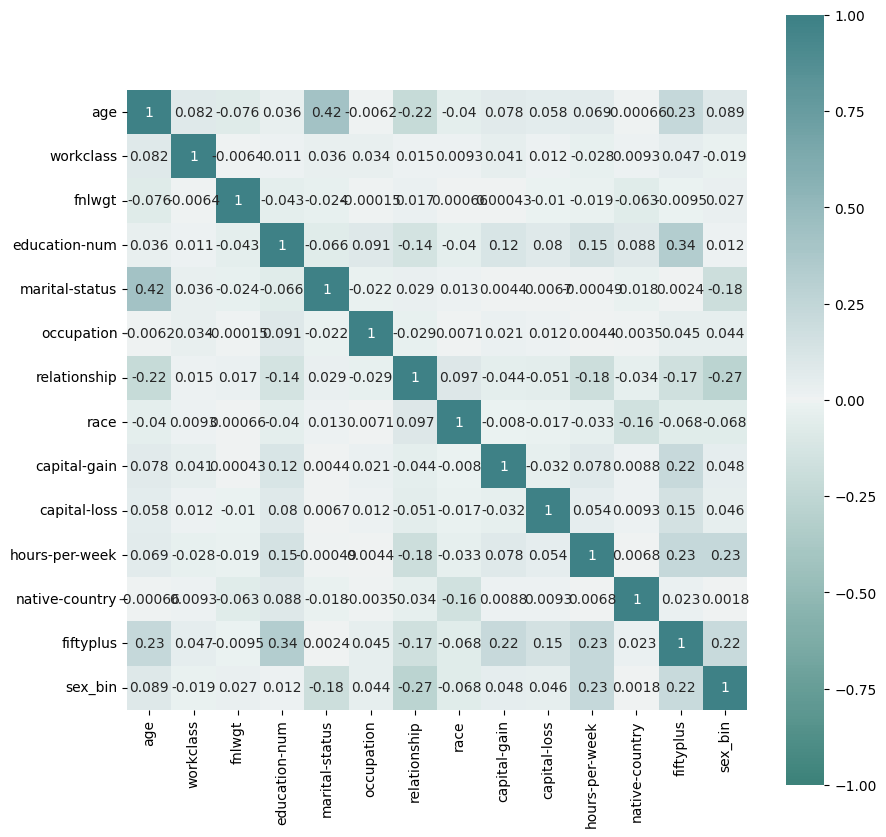

In [22]:
# sns.heatmap(df.corr(),annot=True)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

correlation_= df.corr()

axis_corr = sns.heatmap(
correlation_, 
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(180, 2000, n=500),
square=True, annot=True
)

plt.show()

In [23]:
# dropping not co-related columns...
df.drop(columns=['fnlwgt','race','marital-status','native-country'], inplace=True)

In [24]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, df.columns != 'fiftyplus'] # all rows, column last ignore -1 ---- creating independent features dataset
y = df.iloc[:,df.columns == 'fiftyplus'] # only last column                 ----- creating dependet features dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [26]:
X_train.shape, X_test.shape # total number of train dataset and test dataset

((21799, 9), (10738, 9))

In [27]:
from sklearn.datasets import make_classification # for data set
from sklearn.linear_model import LogisticRegression # for logistic regression model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix # r2square, rscore

# LogisticRegression

In [28]:
model = LogisticRegression() # object of logosticregression model

In [29]:
model.fit(X_train, y_train) # training ur model

f:\DataScience\projects\CensusIncomePredict\censusenv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\DataScience\projects\CensusIncomePredict\censusenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.score(X_train, y_train) # model is f=giving 88% accurate data on train dataseet - training accuracy

0.7999449516032846

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred) # testing accuracy

0.7980070776680946

In [33]:
confusion_matrix(y_test,y_pred)
#We can find the accuracy of the predicted result by interpreting the confusion matrix. 
# By above output, we can interpret that 143+149=  (Correct Output) and 12+26= 38(Incorrect Output).


array([[7825,  285],
       [1884,  744]], dtype=int64)

# DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier()#creating model

In [36]:
model.fit(X_train, y_train) # training model with default parameter..

DecisionTreeClassifier()

In [37]:
y_predict = model.predict(X_test) # predicting for test data
accuracy_score(y_test,y_predict)

0.817470664928292

In [38]:
confusion_matrix(y_test,y_predict)
#We can find the accuracy of the predicted result by interpreting the confusion matrix. 
# By above output, we can interpret that 143+149=  (Correct Output) and 12+26= 38(Incorrect Output).


array([[7194,  916],
       [1044, 1584]], dtype=int64)

In [39]:
param_grid ={
    'max_depth':[3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3]
    
}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=5)

In [43]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [44]:
model2 = DecisionTreeClassifier(max_depth=6,min_samples_leaf=3, min_samples_split=5)

In [45]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5)

In [46]:
y_pred = model2.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.8551871856956603

In [48]:
y_test.shape

(10738, 1)

In [49]:
confusion_matrix(y_test,y_pred)
#We can find the accuracy of the predicted result by interpreting the confusion matrix. 
# By above output, we can interpret that 7743+1364= 9107 (Correct Output) and 382+1249= 1631(Incorrect Output).


array([[7765,  345],
       [1210, 1418]], dtype=int64)

In [50]:
9107/10738

0.848109517601043

In [51]:
df

,age,workclass,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,fiftyplus,sex_bin
0,39,1,13,0,1,2174,0,40,False,1
1,50,2,13,3,2,0,0,13,False,1
2,38,3,9,5,1,0,0,40,False,1
3,53,3,7,5,2,0,0,40,False,1
4,28,3,13,10,3,0,0,40,False,0
...,...,...,...,...,...,...,...,...,...,...
32532,27,3,12,13,3,0,0,38,False,0
32533,40,3,9,6,2,0,0,40,True,1
32534,58,3,9,0,5,0,0,40,False,0
32535,22,3,9,0,4,0,0,20,False,1


## Logistic Regression 2

In [52]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,fiftyplus,sex_bin
0,22,0,12,0,0,25,0,39,0,1
1,33,1,12,3,1,0,0,12,0,1
2,21,2,8,5,0,0,0,39,0,1
3,36,2,6,5,1,0,0,39,0,1
4,11,2,12,10,2,0,0,39,0,0


In [53]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit(df1.drop('fiftyplus', axis=1))

In [54]:
X= ss.transform(df1.drop('fiftyplus', axis=1))
y= df['fiftyplus']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.821
Acc on test data: 0.824


# RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 0.974
Acc on test data: 0.852


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, prediction1))

[[6843  606]
 [ 834 1479]]


In [59]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

       False       0.89      0.92      0.90      7449
        True       0.71      0.64      0.67      2313

    accuracy                           0.85      9762
   macro avg       0.80      0.78      0.79      9762
weighted avg       0.85      0.85      0.85      9762



In [60]:
#Precision: tp/(tp+fp)

print('Precision =' , 6837/(6837+838))

Precision = 0.890814332247557


In [61]:
# recall= tp/(tp+fn)

print('Recall =', 6837/(6837+612))

Recall = 0.9178413209826822


In [62]:
(6837+1475)/97

85.69072164948453

In [63]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2

In [64]:
            cat_label_cols = ['workclass', 'occupation', 'relationship']

            # column for scaler  encoding
            numerical_cols = ['age', 'fnlwgt',
                              'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
            
            # Numerical Pipeline
            num_pipeline = Pipeline(
                steps=[
                    ('imputer', SimpleImputer(strategy='median'), numerical_cols)
                ]
            )

            cat_pipeline = Pipeline(
                steps=[('lableencoder', OneHotEncoder(
                    handle_unknown="ignore"), cat_label_cols)]

            )
            scale_pipeline = Pipeline(steps=[('scale', StandardScaler())])
            preprocessor = ColumnTransformer(transformers=[("num_pipeline", num_pipeline),
                                                           ("cat_pipeline",cat_pipeline),
                                                           ("scale_pipeline", scale_pipeline)])

In [65]:
train_df = pd.read_csv("./../artifacts/train.csv")
test_df = pd.read_csv("./../artifacts/test.csv")

In [66]:
train_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,48,Self-emp-not-inc,243631,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,True
1,31,Private,241360,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,False
2,50,Private,43764,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States,True
3,22,Private,189888,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,False
4,28,Private,107411,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,False


In [67]:
numeric_features = ['age', 'fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['workclass', 'occupation', 'relationship']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [68]:
# clf = Pipeline(
#     steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5))]
# )
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train = train_df.iloc[:,0:-1]
X_test = test_df.iloc[:,0:-1]
y_train = train_df.iloc[:,-1]
y_test = test_df.iloc[:,-1]

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.850


In [71]:
preds = clf.predict(X_test)

In [73]:
preds

array([False, False, False, ..., False,  True, False])

In [74]:
np.mean(preds == y_test)

0.8499282933825035

In [77]:
new_df = pd.DataFrame([{'age': 17, 'workclass':"Private", 'education-num': 13,'occupation':'Sales','relation':'Husband','capital-gain':4500,'capital-loss':0,'hours-per-week':8}])
predictions = clf.predict(new_df)

KeyError: "['fnlwgt'] not in index"

In [72]:
print("model score: %.3f" % clf.score(y_test, preds))

ValueError: X does not contain any features, but ColumnTransformer is expecting 14 features

In [70]:
y_train

0         True
1        False
2         True
3        False
4        False
         ...  
22770    False
22771    False
22772    False
22773    False
22774    False
Name: fiftyplus, Length: 22775, dtype: bool

In [69]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,48,Self-emp-not-inc,243631,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States
1,31,Private,241360,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States
2,50,Private,43764,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States
3,22,Private,189888,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
4,28,Private,107411,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22770,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States
22771,63,Private,216413,Bachelors,13,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States
22772,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
22773,34,Private,242960,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States


In [125]:
target_column_name = 'fiftyplus'

# dropping two very less corelated columns along with target..
drop_columns = ['fiftyplus','education', 'sex', 'fnlwgt', 'race', 'marital-status', 'native-country']

target_feature_train_df = train_df[target_column_name]
train_df.drop(columns=drop_columns, axis=1)
input_feature_train_df = train_df

target_feature_test_df = test_df[target_column_name]
test_df.drop(columns=drop_columns, axis=1)
input_feature_test_df = test_df


# Trnasformating using preprocessor obj

input_feature_train_arr = preprocessor.fit_transform(input_feature_train_df, target_feature_train_df)
input_feature_test_arr = preprocessor.transform(input_feature_test_df)

ValueError: not enough values to unpack (expected 3, got 2)